<a href="https://colab.research.google.com/github/ivanpaulcodes/CPU-Scheduling-Algorithms/blob/main/SJF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

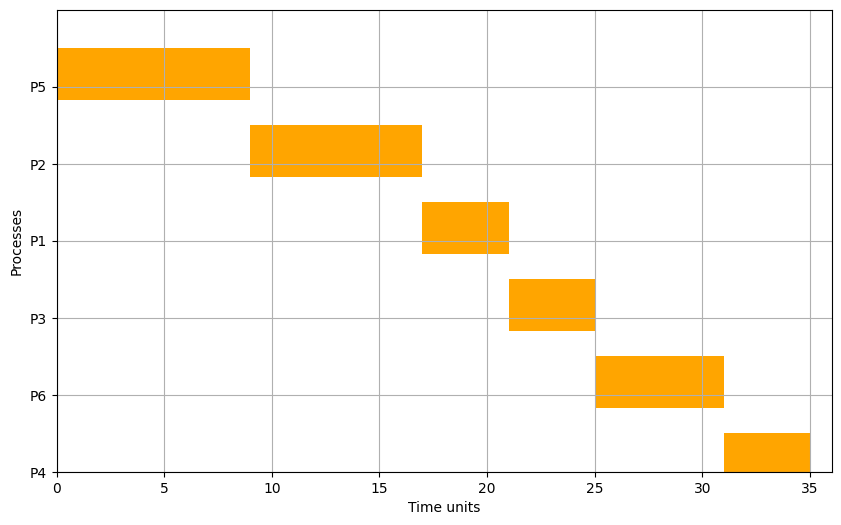

  Process  AT  BT  CT  TAT  WT  RT
0      P5   0   9   9    9   0   0
1      P2   1   8  17   16   8   8
2      P1   2   4  21   19  15  15
3      P3   2   4  25   23  19  19
4      P6   2   6  31   29  23  23
5      P4   3   4  35   32  28  28
Average TAT: 21.333333333333332
Average WT: 15.5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Data from the user's process list
processes = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']
arrival_times = [2, 1, 2, 3, 0, 2]
burst_times = [4, 8, 4, 4, 9, 6]

# Combine the processes, arrival_times, and burst_times into a DataFrame
df = pd.DataFrame({
    'Process': processes,
    'AT': arrival_times,
    'BT': burst_times
})

# Sort by arrival time and then by burst time for SJF
df_sorted = df.sort_values(by=['AT', 'BT', 'Process']).reset_index(drop=True)

# Initialize columns for completion time, turn-around time, and waiting time
df_sorted['CT'] = 0
df_sorted['TAT'] = 0
df_sorted['WT'] = 0
df_sorted['RT'] = -1  # Initialize response time as -1 (not started)

# Initialize current time and start times list for Gantt chart
current_time = 0
start_times = []

# SJF scheduling algorithm
for i in range(len(df_sorted)):
    row = df_sorted.iloc[i]
    if current_time < row['AT']:
        current_time = row['AT']
    if df_sorted.loc[i, 'RT'] == -1:  # If the process has not started yet
        df_sorted.loc[i, 'RT'] = current_time - row['AT']
    start_times.append(current_time)
    current_time += row['BT']
    df_sorted.loc[i, 'CT'] = current_time
    df_sorted.loc[i, 'TAT'] = current_time - row['AT']
    df_sorted.loc[i, 'WT'] = df_sorted.loc[i, 'TAT'] - row['BT']

# Create a Gantt chart
fig, gnt = plt.subplots(figsize=(10, 6))

# Setting Y-axis limits
gnt.set_ylim(0, 50)

# Setting X-axis limits
gnt.set_xlim(0, df_sorted['CT'].max() + 1)

# Setting labels for x-axis and y-axis
gnt.set_xlabel('Time units')
gnt.set_ylabel('Processes')

# Setting ticks on y-axis
gnt.set_yticks([15 * (i + 1) for i in range(len(df_sorted))])
gnt.set_yticklabels(df_sorted['Process'])

# Setting graph attribute
gnt.grid(True)

# Adding bars for Gantt chart
for i in range(len(df_sorted)):
    gnt.add_patch(Rectangle((start_times[i], 15 * (i + 0.5)), df_sorted['BT'][i], 10, facecolor='orange'))

# Inverting the y-axis to have the first process at the top
plt.gca().invert_yaxis()

# Display the Gantt chart
plt.show()

# Print the DataFrame
print(df_sorted)

# Print average TAT and WT
print('Average TAT:', df_sorted['TAT'].mean())
print('Average WT:', df_sorted['WT'].mean())
